In [51]:
import numpy as np
from neuralop.models import FNO
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pickle as pk
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torch

In [4]:
train_data_loc = '/home/arunreddy/ML/Social-Robots/Human_Motion_Refine (1)/data/data_more_processing/normalized_axis_magnitude_train_data_new.npy'
train_data = np.load(train_data_loc, allow_pickle=True)

In [6]:
type(train_data), train_data.shape

(numpy.ndarray, (994, 2, 300, 242))

##### The main thing, here is to first verify if the corresponding pairs actually represent the dataset properly
##### Plot and visualize both the source and target pairs for multiple data-points as a sanity check.

In [7]:
source = train_data[0][0]
target = train_data[0][1]

In [9]:
source.shape, target.shape

((300, 242), (300, 242))

In [28]:
source_torch = torch.tensor(source).unsqueeze(0).permute(0, 2, 1).float()
target_torch = torch.tensor(target).unsqueeze(0).permute(0, 2, 1).float()

In [29]:
# input to the neural operator is of the form, (N, C, T)

In [79]:
fno_model = FNO(n_modes=(150,), hidden_channels=500, in_channels=242, out_channels=242).float()

In [82]:
output_torch = fno_model(source_torch)

In [83]:
output.shape

torch.Size([1, 242, 300])

In [84]:
F.mse_loss(output_torch, target_torch)

tensor(0.0292, grad_fn=<MseLossBackward0>)

##### Basic Training Run

In [94]:
loss_vals = []

##### Model requires really large lr for convergence. lr = 1, is Unusual

In [103]:
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.SGD(fno_model.parameters(), lr=1)  # Stochastic Gradient Descent
num_epochs = 100

In [104]:
for epoch in tqdm(range(num_epochs)):
    optimizer.zero_grad()
    output_torch = fno_model(source_torch)
    loss = criterion(output_torch, target_torch)
    loss.backward()
    optimizer.step()
    loss_vals.append(loss.item())
    if epoch % 10 == 0:  # Print every 10 epochs
        print(f"Epoch {epoch}, Loss: {loss.item()}")

  1%|          | 1/100 [00:01<02:47,  1.69s/it]

Epoch 0, Loss: 0.02253166399896145


 11%|█         | 11/100 [00:18<02:32,  1.71s/it]

Epoch 10, Loss: 0.017673710361123085


 21%|██        | 21/100 [00:35<02:13,  1.69s/it]

Epoch 20, Loss: 0.01369351614266634


 31%|███       | 31/100 [00:54<02:22,  2.06s/it]

Epoch 30, Loss: 0.010445705614984035


 41%|████      | 41/100 [01:11<01:42,  1.75s/it]

Epoch 40, Loss: 0.007856176234781742


 51%|█████     | 51/100 [01:28<01:24,  1.72s/it]

Epoch 50, Loss: 0.00587539141997695


 61%|██████    | 61/100 [01:45<01:06,  1.72s/it]

Epoch 60, Loss: 0.004444703459739685


 71%|███████   | 71/100 [02:03<00:50,  1.73s/it]

Epoch 70, Loss: 0.003479418344795704


 81%|████████  | 81/100 [02:21<00:32,  1.72s/it]

Epoch 80, Loss: 0.0028731797356158495


 91%|█████████ | 91/100 [02:38<00:15,  1.69s/it]

Epoch 90, Loss: 0.0025172345340251923


100%|██████████| 100/100 [02:55<00:00,  1.75s/it]


In [105]:
loss_vals[0]

0.028519848361611366

In [106]:
loss_vals[-1]

0.0023344543296843767

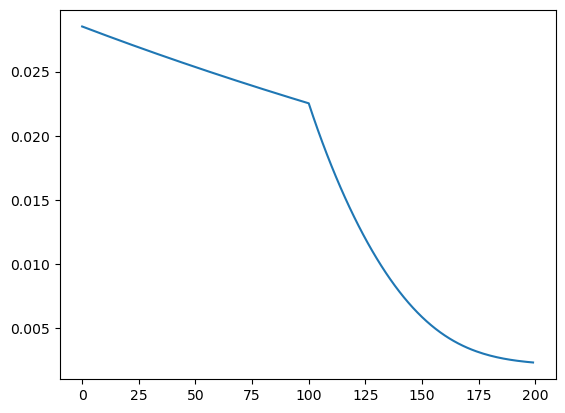

In [107]:
plt.plot(loss_vals)

In [108]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

In [109]:
count_parameters(fno_model)

79494742

In [110]:
242*300

72600

In [113]:
(loss_vals[-1]/abs(target_torch.mean()))*100

tensor(2.1928)

In [117]:
(loss_vals[-1]/(abs(target_torch).mean()))*100

tensor(1.7073)

##### Experiment with more optimizers and newer learning rates. Figure out why you needed a larger learning rate